In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
enrolment_path = "../data/api_data_aadhar_enrolment/*.csv"
import glob

enrol_files = glob.glob(enrolment_path)
enrol_df = pd.concat([pd.read_csv(f) for f in enrol_files], ignore_index=True)

enrol_df["total_enrolment"] = (
    enrol_df["age_0_5"] +
    enrol_df["age_5_17"] +
    enrol_df["age_18_greater"]
)

state_enrol = (
    enrol_df
    .groupby("state")["total_enrolment"]
    .sum()
    .reset_index()
)


In [3]:
demo_path = "../data/api_data_aadhar_demographic/*.csv"
demo_files = glob.glob(demo_path)
demo_df = pd.concat([pd.read_csv(f) for f in demo_files], ignore_index=True)

demo_age_cols = [c for c in demo_df.columns if c.startswith("demo_age")]

demo_df["total_demo_updates"] = demo_df[demo_age_cols].sum(axis=1)

state_demo = (
    demo_df
    .groupby("state")["total_demo_updates"]
    .sum()
    .reset_index()
)


In [4]:
bio_path = "../data/api_data_aadhar_biometric/*.csv"
bio_files = glob.glob(bio_path)
bio_df = pd.concat([pd.read_csv(f) for f in bio_files], ignore_index=True)

bio_age_cols = [c for c in bio_df.columns if c.startswith("bio_age")]

bio_df["total_bio_updates"] = bio_df[bio_age_cols].sum(axis=1)

state_bio = (
    bio_df
    .groupby("state")["total_bio_updates"]
    .sum()
    .reset_index()
)


In [5]:
upr_df = (
    state_enrol
    .merge(state_demo, on="state", how="left")
    .merge(state_bio, on="state", how="left")
)

upr_df.fillna(0, inplace=True)
upr_df.head()


,state,total_enrolment,total_demo_updates,total_bio_updates
0,100000,218,2.0,0.0
1,Andaman & Nicobar Islands,114,1059.0,2384.0
2,Andaman and Nicobar Islands,397,6187.0,18314.0
3,Andhra Pradesh,127681,2295505.0,3714592.0
4,Arunachal Pradesh,4344,36443.0,72394.0


In [6]:
upr_df["total_updates"] = (
    upr_df["total_demo_updates"] +
    upr_df["total_bio_updates"]
)

upr_df["UPR"] = upr_df["total_updates"] / upr_df["total_enrolment"]

upr_df.sort_values("UPR", ascending=False).head(10)


,state,total_enrolment,total_demo_updates,total_bio_updates,total_updates,UPR
12,Daman & Diu,21,644.0,2185.0,2829.0,134.714286
33,ODISHA,1,50.0,34.0,84.0,84.000000
13,Daman and Diu,120,1552.0,6763.0,8315.0,69.291667
48,WESTBENGAL,1,57.0,12.0,69.0,69.000000
2,Andaman and Nicobar Islands,397,6187.0,18314.0,24501.0,61.715365
7,Chandigarh,2723,83361.0,74482.0,157843.0,57.966581
3,Andhra Pradesh,127681,2295505.0,3714592.0,6010097.0,47.071193
8,Chhattisgarh,103219,2005434.0,2648729.0,4654163.0,45.090177
10,Dadra and Nagar Haveli,744,6033.0,27235.0,33268.0,44.715054
15,Goa,2333,35120.0,68397.0,103517.0,44.370767


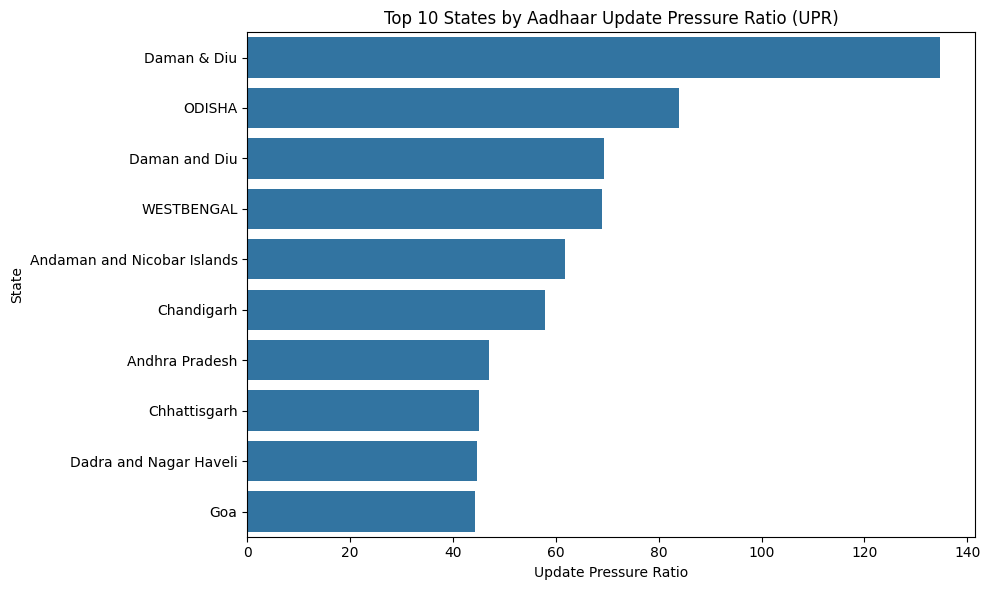

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=upr_df.sort_values("UPR", ascending=False).head(10),
    x="UPR",
    y="state"
)

plt.title("Top 10 States by Aadhaar Update Pressure Ratio (UPR)")
plt.xlabel("Update Pressure Ratio")
plt.ylabel("State")
plt.tight_layout()
plt.show()
